# Objective: Linear Classification for Breast Cancer
Here, I'm going to build a linear classification model using PyTorch to distinguish positive and negative cases in terms of breast cancer.

## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Load Data
This covers how to get the data and load the data into the code. Then, analyze the data to figure out how to build a model out of the data.

In [2]:
from sklearn.datasets import load_breast_cancer

# load the data
data = load_breast_cancer()

# check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [3]:
# analyze the data: Bunch object 
# Bunch object is a sort of dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# input data X
data.data.shape

(569, 30)

In [5]:
# target y
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.target.shape

(569,)

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Preprocess Data
This covers how to split training data set and test data set. Then this shows how to normalize the data.

In [9]:
# import library for spliting
from sklearn.model_selection import train_test_split

# split the data into training and test sets
# training data: 67%
# test data: 33%
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [10]:
# import library for normalization
from sklearn.preprocessing import StandardScaler

# normalize the data for the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# more detail about the differece between fit_transform vs transform
# ref: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [11]:
# convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

## Build Model
This covers how to build a linear classification model to distinguish positive and negative cases of breast cancer with a choice of loss function and optimizer.

In [12]:
# build the model
model = nn.Linear(D, 1)

In [13]:
# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

## Training
This covers how to train the linear classification model with the input data that we normalized.

In [14]:
# the number of epochs
epochs = 1000

# losses will be stored to plot the results at the end
train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for epoch in range(epochs):
    # zero the parameter gradients to make sure they are zero
    optimizer.zero_grad()
    
    # forward pass
    outputs_train = model(X_train)
    loss_train = criterion(outputs_train, y_train)
    
    # backward and optimize
    loss_train.backward()
    optimizer.step()
    
    # get test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)
    
    # save the losses
    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()
    
    # print out the progress
    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.5369, Test Loss: 0.5382
Epoch 100/1000, Train Loss: 0.3910, Test Loss: 0.4028
Epoch 150/1000, Train Loss: 0.3133, Test Loss: 0.3281
Epoch 200/1000, Train Loss: 0.2649, Test Loss: 0.2793
Epoch 250/1000, Train Loss: 0.2314, Test Loss: 0.2444
Epoch 300/1000, Train Loss: 0.2067, Test Loss: 0.2185
Epoch 350/1000, Train Loss: 0.1877, Test Loss: 0.1988
Epoch 400/1000, Train Loss: 0.1726, Test Loss: 0.1834
Epoch 450/1000, Train Loss: 0.1604, Test Loss: 0.1713
Epoch 500/1000, Train Loss: 0.1503, Test Loss: 0.1614
Epoch 550/1000, Train Loss: 0.1419, Test Loss: 0.1532
Epoch 600/1000, Train Loss: 0.1348, Test Loss: 0.1463
Epoch 650/1000, Train Loss: 0.1288, Test Loss: 0.1404
Epoch 700/1000, Train Loss: 0.1235, Test Loss: 0.1353
Epoch 750/1000, Train Loss: 0.1189, Test Loss: 0.1308
Epoch 800/1000, Train Loss: 0.1149, Test Loss: 0.1268
Epoch 850/1000, Train Loss: 0.1113, Test Loss: 0.1232
Epoch 900/1000, Train Loss: 0.1081, Test Loss: 0.1200
Epoch 950/1000, Train Loss: 0

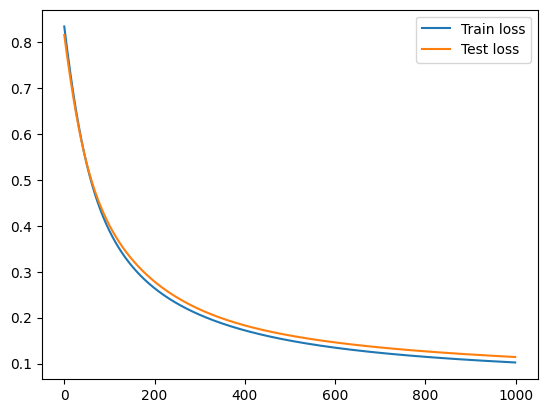

In [15]:
# plot the train loss and test loss per epoch
plt.plot(train_losses, label="Train loss")
plt.plot(test_losses, label="Test loss")
plt.legend()
plt.show()

## Result
This shows the result of the linear classification model by calculating the accuracy of the model.

In [16]:
# calculate accuracies for training and test data outputs
with torch.no_grad():
    p_train = model(X_train)
    p_train = (p_train.numpy() > 0)
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(X_test)
    p_test = (p_test.numpy() > 0)
    test_acc = np.mean(y_test.numpy() == p_test)
    
# print out the accuracies
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9628


## Save Model
This covers how to locally save the trained model.

In [17]:
# define the object that we want to save
trained_model = model.state_dict()

In [18]:
# save the model
torch.save(trained_model, 'model.pt')

## Load Model
This covers how to load the saved model and verify whether the results are same or not.

In [19]:
# define structure of model
new_model = nn.Linear(D, 1)

# load the model from saved trained model
new_model.load_state_dict(torch.load('model.pt'))

/tmp/ipykernel_9967/1508741862.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [20]:
# evaluate the model's accuracies
with torch.no_grad():
    p_train = new_model(X_train)
    p_train = (p_train.numpy() > 0)
    train_acc = np.mean(p_train == y_train.numpy())
    
    p_test = new_model(X_test)
    p_test = (p_test.numpy() > 0)
    test_acc = np.mean(p_test == y_test.numpy())
    
# print out the accuracies
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9628
